In [1]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [2]:
data_root = '../../data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=5.66s)


# Stats about the Dataset

In [3]:
# print stats about the given dataset
print ('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print ('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print ('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print ('%s refs are in split [%s].' % (len(ref_ids), split))

dataset [refcoco_unc] contains: 
142210 expressions for 50000 refs in 19994 images.

Among them:
42404 refs are in split [train].
3811 refs are in split [val].
3785 refs are in split [test].


In [14]:
# randomly sample one ref
ref_ids = refer.getRefIds(split='test')
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
print(ref_id)
print(ref_ids[0])
print(refer.Refs[0])
ref = refer.Refs[ref_ids]

41479
25
{'sent_ids': [0, 1, 2], 'file_name': 'COCO_train2014_000000581857_16.jpg', 'ann_id': 1719310, 'ref_id': 0, 'image_id': 581857, 'split': 'train', 'sentences': [{'tokens': ['the', 'lady', 'with', 'the', 'blue', 'shirt'], 'raw': 'THE LADY WITH THE BLUE SHIRT', 'sent_id': 0, 'sent': 'the lady with the blue shirt'}, {'tokens': ['lady', 'with', 'back', 'to', 'us'], 'raw': 'lady w back to us', 'sent_id': 1, 'sent': 'lady with back to us'}, {'tokens': ['blue', 'shirt'], 'raw': 'blue shirt', 'sent_id': 2, 'sent': 'blue shirt'}], 'category_id': 1}


TypeError: unhashable type: 'list'

In [52]:
ref_ids = refer.getRefIds(split='test')
ref_id = ref_ids[0]
print('REF ID: ,' , ref_id)
ref = refer.Refs[ref_id]
print()
print(ref)
print()


img_id = refer.getImgIds(ref_id)
img = refer.loadImgs(img_id)[0]
print('IMG INFOS: ',img)
print('IMG ID: ',img_id)

ann_ids = refer.getAnnIds(img['id'])
print('ANN IDS: ',ann_ids)

for i in range(len(ann_ids)):
    ann = refer.loadAnns(ann_ids[i])[0]
   
    print('IMAGE ID ',ann['image_id'])
    print('ANN '+str(i+1)+': ', ann)

print('#################')
print(refer.loadAnns(ann_ids))

REF ID: , 25

{'sent_ids': [71, 72, 73], 'file_name': 'COCO_train2014_000000581563_3.jpg', 'ann_id': 1345868, 'ref_id': 25, 'image_id': 581563, 'split': 'testB', 'sentences': [{'tokens': ['lower', 'left', 'corner', 'darkness'], 'raw': 'lower left corner darkness', 'sent_id': 71, 'sent': 'lower left corner darkness'}, {'tokens': ['bpttom', 'left', 'dark'], 'raw': 'bpttom left dark', 'sent_id': 72, 'sent': 'bpttom left dark'}, {'tokens': ['black', 'van', 'in', 'front', 'of', 'cab'], 'raw': 'black van in front of cab', 'sent_id': 73, 'sent': 'black van in front of cab'}], 'category_id': 3}

IMG INFOS:  {'license': 3, 'file_name': 'COCO_train2014_000000581563.jpg', 'coco_url': 'http://mscoco.org/images/581563', 'height': 500, 'width': 333, 'date_captured': '2013-11-16 17:51:55', 'flickr_url': 'http://farm1.staticflickr.com/125/337273203_7eb35b845b_z.jpg', 'id': 581563}
IMG ID:  [581563]
ANN IDS:  [344837, 405760, 1213670, 1345868, 1735830, 2173204, 2232019, 2232030, 2232043]
IMAGE ID  5815

# Show Refered Object and its Expressions

ref_id [26441] (ann_id [1717234])
1. snowboarding buy in yellow
2. man in yellow
3. yellow guy


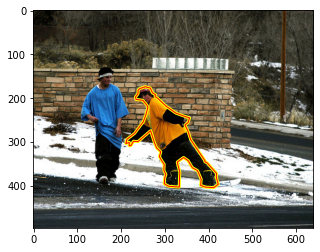

In [5]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print ('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. snowboarding buy in yellow
2. man in yellow
3. yellow guy


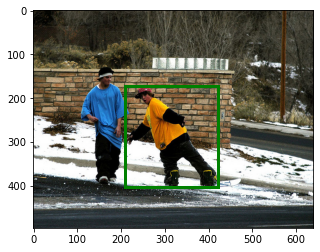

In [6]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [8]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print ('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))

sent_id[75185]: snowboarding buy in yellow
sent_id[75186]: man in yellow
sent_id[75187]: yellow guy
